<a href="https://colab.research.google.com/github/tusharsuthar4828/DataScience_ExcelR/blob/main/SimpleLinearDeliveryTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
# import dataset
dataset=pd.read_csv('/content/delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


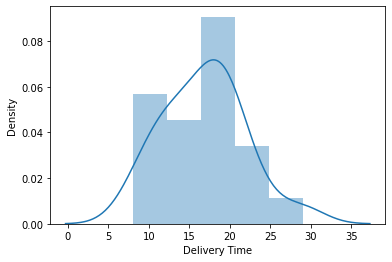

In [5]:
sns.distplot(dataset['Delivery Time'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


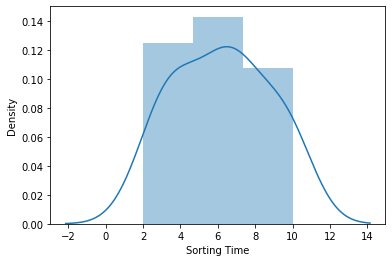

In [6]:
sns.distplot(dataset['Sorting Time'])


In [7]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'DT', 'Sorting Time':'ST'},axis=1)
dataset

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [14]:
print(kurtosis(dataset.DT))
print(kurtosis(dataset.ST))

-0.02558576894549036
-1.1653901357029155


In [16]:
print(skew(dataset.DT))
print(skew(dataset.ST))


0.326702631656106
0.043680994983108075


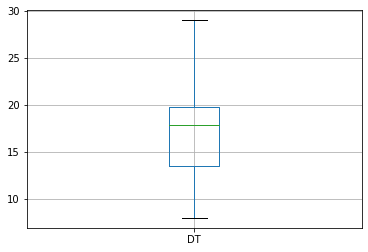

In [17]:
#Box plot
dataset.boxplot(column=['DT'])

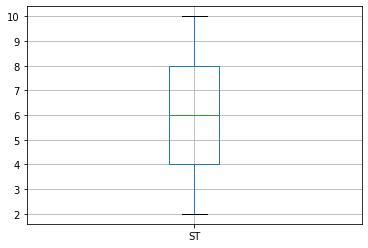

In [18]:
#Box plot
dataset.boxplot(column=['ST'])

In [27]:
# Correlation Analysis
dataset.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


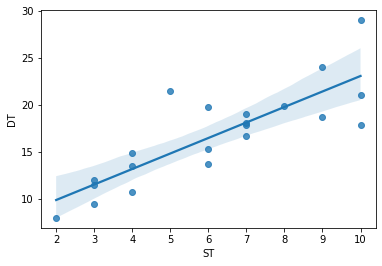

In [28]:
sns.regplot(x=dataset['ST'],y=dataset['DT'])

In [20]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = dataset).fit()

In [21]:
#Coefficients
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [22]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        09:55:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


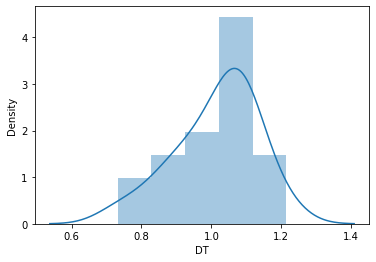

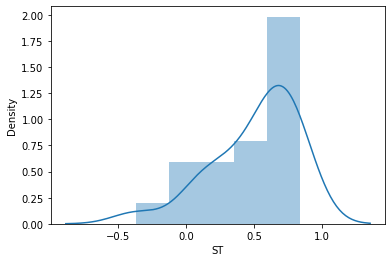

<Figure size 432x288 with 0 Axes>

In [37]:
dataset=dataset
dataset['DT'] = np.log(dataset['DT'])
dataset['ST'] = np.log(dataset['ST'])
sns.distplot(dataset['DT'])
fig = plt.figure()
sns.distplot(dataset['ST'])
fig = plt.figure()

In [42]:
model_2 = smf.ols("ST~DT",data = dataset).fit()


In [43]:
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     77.21
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           4.05e-08
Time:                        10:02:53   Log-Likelihood:                 11.820
No. Observations:                  21   AIC:                            -19.64
Df Residuals:                      19   BIC:                            -17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9199      0.278     -6.913      0.000      -2.501      -1.339
DT             2.3908      0.272      8.787      0.000       1.821       2.960
==============================================================================
Omnibus:                        1.317   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.518   Jarque-Bera (JB):                0.968
Skew:                          -0.237   Prob(JB):                        0.616
Kurtosis:                       2.061   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


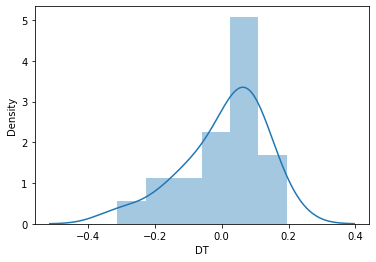

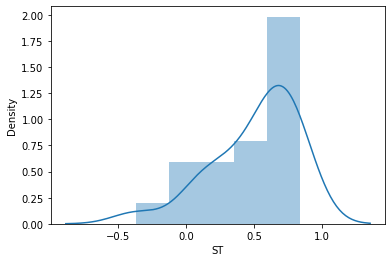

<Figure size 432x288 with 0 Axes>

In [45]:
data_2=dataset
dataset['DT'] = np.log(dataset['DT'])
sns.distplot(dataset['DT'])
fig = plt.figure()
sns.distplot(dataset['ST'])
fig = plt.figure()

In [46]:
model_3 = smf.ols("ST~DT",data = data_2).fit()


In [47]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     88.53
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           1.39e-08
Time:                        10:03:13   Log-Likelihood:                 12.989
No. Observations:                  21   AIC:                            -21.98
Df Residuals:                      19   BIC:                            -19.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4885      0.030     16.308      0.000       0.426       0.551
DT             2.3243      0.247      9.409      0.000       1.807       2.841
==============================================================================
Omnibus:                        1.019   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                0.867
Skew:                          -0.244   Prob(JB):                        0.648
Kurtosis:                       2.132   Cond. No.                         8.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


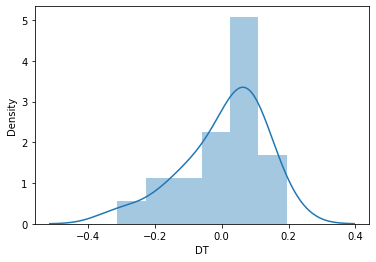

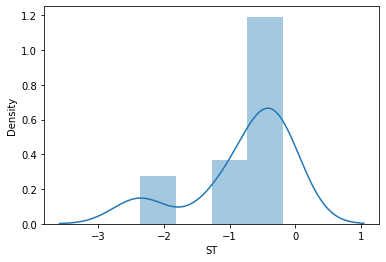

<Figure size 432x288 with 0 Axes>

In [49]:
data_3=dataset
dataset['ST'] = np.log(dataset['ST'])
sns.distplot(dataset['DT'])
fig = plt.figure()
sns.distplot(dataset['ST'])
fig = plt.figure()

In [50]:
model_4 = smf.ols("ST~DT",data = data_3).fit()

In [51]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     40.05
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           5.79e-06
Time:                        10:03:26   Log-Likelihood:                -10.207
No. Observations:                  20   AIC:                             24.41
Df Residuals:                      18   BIC:                             26.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9251      0.097     -9.495      0.000      -1.130      -0.720
DT             5.9953      0.947      6.329      0.000       4.005       7.986
==============================================================================
Omnibus:                        1.227   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                0.870
Skew:                          -0.492   Prob(JB):                        0.647
Kurtosis:                       2.724   Cond. No.                         9.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""